Epoch 1/50
133/133 [==============================] - 7s 12ms/step - loss: 0.0047
Epoch 2/50
133/133 [==============================] - 2s 12ms/step - loss: 9.7351e-04
Epoch 3/50
133/133 [==============================] - 2s 18ms/step - loss: 9.5174e-04
Epoch 4/50
133/133 [==============================] - 2s 13ms/step - loss: 9.3054e-04
Epoch 5/50
133/133 [==============================] - 2s 12ms/step - loss: 9.1885e-04
Epoch 6/50
133/133 [==============================] - 3s 19ms/step - loss: 9.2599e-04
Epoch 7/50
133/133 [==============================] - 3s 24ms/step - loss: 8.7129e-04
Epoch 8/50
133/133 [==============================] - 3s 24ms/step - loss: 8.6951e-04
Epoch 9/50
133/133 [==============================] - 4s 27ms/step - loss: 8.4670e-04
Epoch 10/50
133/133 [==============================] - 3s 20ms/step - loss: 8.0940e-04
Epoch 11/50
133/133 [==============================] - 3s 20ms/step - loss: 8.0787e-04
Epoch 12/50
133/133 [==============================] - 2

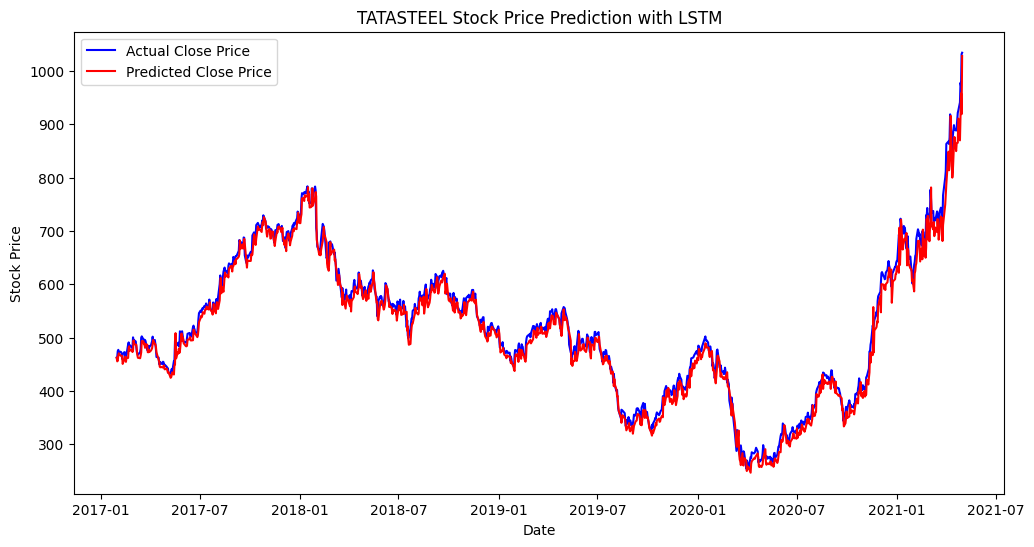

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('TATASTEEL.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Use 'Close' and 'Volume' columns for prediction
data = data[['Close', 'Volume']]

# Data preprocessing
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create training and testing datasets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # You can adjust this sequence length
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, data.shape[1])))
model.add(LSTM(units=50))
model.add(Dense(units=data.shape[1]))  # Output size should match the number of features
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform to get actual stock prices and volumes
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size + seq_length:], y_test[:, 0], label='Actual Close Price', color='blue')
plt.plot(data.index[train_size + seq_length:], y_pred[:, 0], label='Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TATASTEEL Stock Price Prediction with LSTM')
plt.legend()
plt.show()
